In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("seismic-bumps.csv")

In [3]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


## Feature preprocessing (light)

In [4]:
#remove useless variables from the dataset
column2drop = ['seismoacoustic', 'gdpuls', 'hazard','nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy']
df.drop(column2drop, axis=1, inplace=True)

In [5]:
df.head()

,seismic,shift,genergy,gpuls,gdenergy,nbumps,class
0,a,N,15180,48,-72,0,0
1,a,N,14720,33,-70,1,0
2,a,N,8050,30,-81,0,0
3,a,N,28820,171,-23,1,0
4,a,N,12640,57,-63,0,0


## Pattern mining preprocessing

In [6]:
#numero tra parentesi è numero di bin, divide in quartili
df['genergyBin'] = pd.qcut(df['genergy'], 4)
df['gpulsBin'] = pd.qcut(df['gpuls'], 4)
df['gdenergyBin'] = pd.qcut(df['gdenergy'], 4)
df['nbumpsBin'] = pd.cut(df['nbumps'], 4)

df.drop(['nbumps', 'gdenergy', 'genergy', 'gpuls'], axis=1, inplace=True)

In [7]:
df.head()

,seismic,shift,class,genergyBin,gpulsBin,gdenergyBin,nbumpsBin
0,a,N,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]","(-0.009, 2.25]"
1,a,N,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]","(-0.009, 2.25]"
2,a,N,0,"(99.999, 11660.0]","(1.999, 190.0]","(-96.001, -37.0]","(-0.009, 2.25]"
3,a,N,0,"(25485.0, 52832.5]","(1.999, 190.0]","(-37.0, -6.0]","(-0.009, 2.25]"
4,a,N,0,"(11660.0, 25485.0]","(1.999, 190.0]","(-96.001, -37.0]","(-0.009, 2.25]"


In [8]:
df['genergyBin'] = df['genergyBin'].astype(str) + '_gene'
df['gdenergyBin'] = df['gdenergyBin'].astype(str) + '_gdene'
df['gpulsBin'] = df['gpulsBin'].astype(str) + '_gpuls'
df['nbumpsBin'] = df['nbumpsBin'].astype(str) + '_bumps'

In [9]:
class_dict = {0: 'non hazardous', 1: 'hazardous'}
df['class'] = df['class'].map(class_dict)

In [10]:
# Transform categorical attributes ('seismic' and 'shift') into numerical ones 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['seismic'] = le.fit_transform(df['seismic'])
df['shift'] = le.fit_transform(df['shift'])

In [11]:
seismic_dict = {0: 'lack of hazard', 1: 'low hazard'}
df['seismic'] = df['seismic'].map(seismic_dict)

shift_dict = {0: 'coal-getting', 1: 'preparation'}
df['shift'] = df['shift'].map(shift_dict)

In [12]:
df.head()

,seismic,shift,class,genergyBin,gpulsBin,gdenergyBin,nbumpsBin
0,lack of hazard,coal-getting,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene","(-0.009, 2.25]_bumps"
1,lack of hazard,coal-getting,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene","(-0.009, 2.25]_bumps"
2,lack of hazard,coal-getting,non hazardous,"(99.999, 11660.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene","(-0.009, 2.25]_bumps"
3,lack of hazard,coal-getting,non hazardous,"(25485.0, 52832.5]_gene","(1.999, 190.0]_gpuls","(-37.0, -6.0]_gdene","(-0.009, 2.25]_bumps"
4,lack of hazard,coal-getting,non hazardous,"(11660.0, 25485.0]_gene","(1.999, 190.0]_gpuls","(-96.001, -37.0]_gdene","(-0.009, 2.25]_bumps"


In [13]:
X = df.values.tolist()

In [14]:
X[0]

['lack of hazard',
 'coal-getting',
 'non hazardous',
 '(11660.0, 25485.0]_gene',
 '(1.999, 190.0]_gpuls',
 '(-96.001, -37.0]_gdene',
 '(-0.009, 2.25]_bumps']

In [15]:
#non usare
#Y = df.values
#Z = Y[df['class']=='hazardous']
#Z

In [16]:
#!pip install pyfim
from fim import apriori

In [17]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [18]:
#supp=2 ; 0.02
#supp=20 ; 0.2

itemsets = apriori(X, target='s', supp=3, zmin=3, report='S')

In [19]:
itemsets[:5]

[(('hazardous', '(669.0, 4518.0]_gpuls', 'preparation'), 3.3281733746130033),
 (('hazardous', '(52832.5, 2595650.0]_gene', 'preparation'),
  3.4442724458204337),
 (('hazardous', 'low hazard', 'preparation'), 3.2507739938080498),
 (('hazardous', 'preparation', '(-0.009, 2.25]_bumps'), 3.5990712074303404),
 (('(2.25, 4.5]_bumps', '(669.0, 4518.0]_gpuls', '(52832.5, 2595650.0]_gene'),
  3.521671826625387)]

In [20]:
len(itemsets)

901

In [21]:
# frequent itemset
itemsets[0][0]

('hazardous', '(669.0, 4518.0]_gpuls', 'preparation')

In [22]:
# support
itemsets[0][1]

3.3281733746130033

In [23]:
#maximal
itemsets = apriori(X, target='m', supp=3, zmin=3, report='S')

In [24]:
itemsets[:5]

[(('hazardous', '(669.0, 4518.0]_gpuls', 'preparation'), 3.3281733746130033),
 (('hazardous', '(52832.5, 2595650.0]_gene', 'preparation'),
  3.4442724458204337),
 (('hazardous', 'low hazard', 'preparation'), 3.2507739938080498),
 (('hazardous', 'preparation', '(-0.009, 2.25]_bumps'), 3.5990712074303404),
 (('(2.25, 4.5]_bumps',
   '(669.0, 4518.0]_gpuls',
   '(52832.5, 2595650.0]_gene',
   'preparation'),
  3.48297213622291)]

In [25]:
itemsets[0][0]

('hazardous', '(669.0, 4518.0]_gpuls', 'preparation')

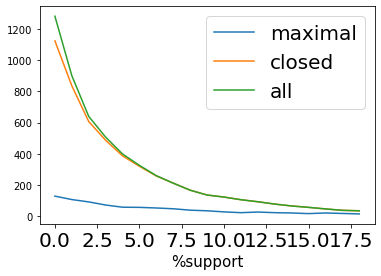

In [59]:
len_max_it = []
len_cl_it = []
len_all_it = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    cl_itemsets = apriori(X, target='c', supp=i, zmin=3)
    all_itemsets = apriori(X, target='s', supp=i, zmin=3)
    len_max_it.append( len(max_itemsets)  )
    len_cl_it.append( len(cl_itemsets) )
    len_all_it.append( len(all_itemsets)  )
    
plt.plot(len_max_it, label='maximal')
plt.plot(len_cl_it, label='closed')
plt.plot(len_all_it, label='all')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)

plt.show()

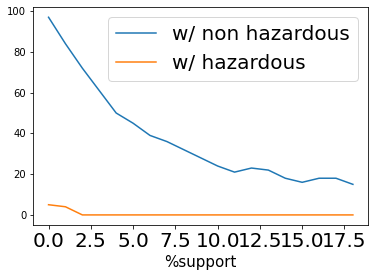

In [27]:
filter_1 = []
filter_2 = []
for i in range(2, 20+1):
    max_itemsets = apriori(X, target='m', supp=i, zmin=3)
    
    filter_1.append( len([item for item in max_itemsets if 'non hazardous' in item[0]])  )
    filter_2.append( len([item for item in max_itemsets if 'hazardous' in item[0]]) )
    
plt.plot(filter_1, label='w/ non hazardous')
plt.plot(filter_2, label='w/ hazardous')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('%support', fontsize=15)
#va fatto partire da 2 la x
plt.show()

In [44]:
rules = apriori(X, target='r', supp=3, zmin=3, conf=60, report='aScl')

In [45]:
len (rules)

2111

In [46]:
rules[:5]
#Supporto in val assoluto
#Supporto in percentuale
#confidenza
#Lift

[('(52832.5, 2595650.0]_gene',
  ('hazardous', '(669.0, 4518.0]_gpuls', 'preparation'),
  76,
  2.941176470588235,
  0.8837209302325582,
  3.5348837209302326),
 ('(669.0, 4518.0]_gpuls',
  ('hazardous', '(52832.5, 2595650.0]_gene', 'preparation'),
  76,
  2.941176470588235,
  0.8539325842696629,
  3.4210260430276107),
 ('(52832.5, 2595650.0]_gene',
  ('hazardous', '(669.0, 4518.0]_gpuls'),
  77,
  2.9798761609907123,
  0.875,
  3.5),
 ('(669.0, 4518.0]_gpuls',
  ('hazardous', '(52832.5, 2595650.0]_gene'),
  77,
  2.9798761609907123,
  0.8369565217391305,
  3.353016514998315),
 ('preparation',
  ('hazardous', '(669.0, 4518.0]_gpuls'),
  86,
  3.3281733746130033,
  0.9772727272727273,
  1.5185043459246705)]

In [47]:
#A=np.zeros(0)
#for a in range (0,403):
#    if rules[a][0]=="hazardous":
#        np.append(rules[a][0], rules[a][1])

In [53]:
K= []
for a in range(0, len(rules)):
    if rules[a][1] == "hazardous":
        K.append(rules[a])
K   
len(K)

0

In [54]:
for a in range(0, len(K)):
    print(K[a][0], K[a][1])    

In [55]:
# <--
rules[0][0], rules[0][1]

('(52832.5, 2595650.0]_gene',
 ('hazardous', '(669.0, 4518.0]_gpuls', 'preparation'))

In [36]:
# asbolute support
rules[0][2]

341

In [68]:
# support as percentage
rules[0][3]

13.196594427244582

In [69]:
# confidence
rules[0][4]

0.9419889502762431

In [72]:
# lift
rules[0][5]

1.0083262002956968

In [83]:
K= []
for a in range(0, len(rules)):
    if rules[a][0] == "hazardous":
        K.append(rules[a])
        
K

[]

In [56]:
for r in rules:
    if r[0] == 'hazardous':
        print(r)
        
r

('lack of hazard',
 ('(-0.009, 2.25]_bumps', 'non hazardous'),
 1486,
 57.50773993808049,
 0.6757617098681219,
 1.038149975207626)

In [73]:
[r for r in rules if r[0] == 'hazardous'][0]

IndexError: list index out of range

In [78]:
print( 'to_predict:', [r for r in rules if r[0] == 'hazardous'][0][0])
print( 'how?', [r for r in rules if r[0] == 'hazardous'][0][1])

IndexError: list index out of range

In [ ]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [76]:
len_r = []
for i in range(1, 20+1): #support
    len_r_wrt_i = []
    for j in range(60, 80+1): #confidence
        rules = apriori(X, target='r', supp=i, zmin=3, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
        
    len_r.append(len_r_wrt_i)

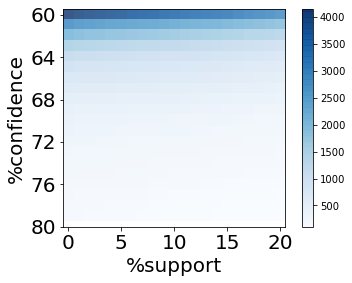

In [77]:
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%support', fontsize=20)
plt.ylabel('%confidence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()